<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Supervised_Learning/Hyperparameter%20Tuning%20in%20Python/3%20Random%20Search/3%20Random%20Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Search

In this chapter you will be introduced to another popular automated hyperparameter tuning methodology called Random Search. You will learn what it is, how it works and importantly how it differs from grid search. You will learn some advantages and disadvantages of this method and when to choose this method compared to Grid Search. You will practice undertaking a Random Search with Scikit Learn as well as visualizing & interpreting the output.

# Introducing Random Search

Got It!
1. Introducing Random Search
In this lesson we will cover the concept of random search, how it differs from grid search, as well as some advantages and disadvantages of this method.

2. What you already know
A random search is very similar to a grid search several key steps. We still define an estimator, which hyperparameters to tune and the range of values for each hyperparameter. Similarly, we still set a cross-validation scheme and scoring function. However when it comes to undertaking the search, rather than trying every single combination, you randomly sample N combinations and try these out. This may seem like a really odd thing to do. Why would you do this and why does it work?

3. Why does this work?
An important paper by Yoshua Bengio and James Bergstra outlines that reason that this works can be explained with two fundamental principles: Firstly. Not every hyperparameter is as important (we hinted at this in the Grid Search Section) Secondly, a little trick of probability

4. A probability trick
Let's explain the probability trick. Let's say that we have this grid. It has 100 cells, so 100 different models. 10 different values each of two hyperparameters Let us say that these 5 models are the best, highlighted in green. How many models would we need to run with random search to have a 95% chance of getting one of the green squares?

5. A probability Trick
Let's consider how likely it is that we continue to completely miss the good models, if we randomly select hyperparameter combinations uniformly On our first trial we have 5% chance of getting one of these squares as it is 5 squares out of 100. Therefore we have (1 minus 0-point-05) chance of missing these squares. If we do a second trial, we now have (1 minus 0-point-05) times (1 minus 0-point-05) of missing that range. For a third trial we have (1 minus 0-point-05) times (1 minus 0-point-05) times (1 minus 0-point-05) chance of missing that range. In fact, with n trials we have 1 minus 0-point-05 to the power n chance that every single trial misses all the good models.

6. A probability trick
So how many trials to have a high chance of being in the region? We know that the probability of missing everything is (1-0.05)^n So the probability of getting something in that area must be 1-(miss everything) which is 1-(1-0.05)^n. Without going into too much details, we can solve to get the answer as n >= 59

7. A probability trick
So what does that all mean? With relatively few trials we can get close to our maximum score with a relatively high probability. In essence, it is very unlikely that you will continue to miss everything for a long time A Grid Search may spend lots of time covering a bad area.

8. Some important notes
There are some important things to keep in mind with random search. Your possible score is still only as good as the grid you set! If you a bad grid to sample from, you will not get a great model Remember to fairly compare this to grid search, you need to have the same modeling 'budget'. For example, 200 models on grid search and 200 models in random search.

9. Creating a random sample of hyperparameters
We can create our own random sample of hyperparameter combinations. We firstly set the hyperparameter lists as you have done before with numpy linspace and a range function. You can then create a single list of hyperparameter combinations that we can sample from using itertools product function. Then we can randomly select 100 models from these lists using NumPy's handy random choice function, which gives us 100 random indexes we can use to index into the created list in the last line.

10. Visualizing a Random Search
A visual inspection of the hyperparameter values chosen by random search is a nice way to demonstrate how it works. Notice how the coverage of this is very wide but it does not cover thoroughly?

11. Let's practice!
Let's practice sampling and visualizing our own random search!

# Randomly Sample Hyperparameters

To undertake a random search, we firstly need to undertake a random sampling of our hyperparameter space.

In this exercise, you will firstly create some lists of hyperparameters that can be zipped up to a list of lists. Then you will randomly sample hyperparameter combinations preparation for running a random search.

You will use just the hyperparameters learning_rate and min_samples_leaf of the GBM algorithm to keep the example illustrative and not overly complicated.

Instructions

1. Create a list of 200 values for the learning_rate hyperparameter between 0.01 and 1.5 and assign to the list learn_rate_list.

2. Create a list of values between 10 and 40 inclusive for the hyperparameter min_samples_leaf and assign to the list min_samples_list.

3. Combine these lists into a list of lists to sample from.

4. Randomly sample 250 models from these hyperparameter combinations and print the result.

In [ ]:
'''
# Create list of combinations
from itertools import product
combinations_list = [list(x) for x in
product(learn_rate_list, min_samples_leaf_list)]
'''

# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01,1.5,200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10,41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a random search.
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 250, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
print(combinations_random_chosen)

'''
<script.py> output:
    [[1.305326633165829, 14], [0.6015075376884422, 24], [0.6089949748743718, 35], [1.3128140703517588, 33], [0.3244723618090452, 23], [0.07738693467336683, 27], [0.2421105527638191, 18], [1.1855276381909547, 24], [0.17472361809045225, 11], [0.7662311557788944, 12], [1.0657286432160804, 39], [0.7287939698492463, 22], [1.2604020100502513, 40], [1.0881909547738693, 12], [1.2079899497487436, 39], [1.4475879396984925, 15], [1.327788944723618, 16], [0.7587437185929649, 37], [0.46673366834170854, 10], [0.2720603015075377, 22], [1.2079899497487436, 12], [1.095678391959799, 27], [0.5790452261306532, 31], [0.18969849246231157, 22], [0.17472361809045225, 40], [1.2604020100502513, 39], [0.33195979899497485, 39], [0.05492462311557789, 32], [0.6314572864321608, 40], [0.9758793969849247, 14], [0.7886934673366834, 40], [1.200502512562814, 15], [0.4592462311557789, 22], [0.8635678391959799, 16], [0.7512562814070352, 37], [0.039949748743718594, 18], [0.6838693467336683, 38], [1.1480904522613065, 29], [0.42180904522613066, 31], [0.9010050251256281, 31], [0.26457286432160804, 29], [0.945929648241206, 12], [0.46673366834170854, 16], [1.1630653266331659, 18], [0.7587437185929649, 13], [0.6464321608040201, 16], [0.7812060301507537, 14], [1.0282914572864321, 35], [0.6838693467336683, 12], [0.19718592964824122, 22], [0.12231155778894472, 10], [1.4850251256281406, 15], [0.6988442211055276, 31], [0.4966834170854271, 40], [0.2945226130653266, 31], [1.222964824120603, 28], [1.0582412060301507, 25], [0.7362814070351759, 30], [1.1930150753768844, 17], [0.945929648241206, 21], [1.095678391959799, 35], [0.414321608040201, 39], [1.1555778894472362, 34], [0.7812060301507537, 24], [1.3352763819095477, 29], [0.9309547738693467, 10], [1.0657286432160804, 20], [1.07321608040201, 39], [1.3128140703517588, 21], [1.222964824120603, 18], [0.09984924623115578, 16], [0.36939698492462314, 35], [1.1555778894472362, 33], [0.17472361809045225, 24], [0.024974874371859294, 28], [1.178040201005025, 24], [0.6314572864321608, 29], [0.8261306532663316, 24], [1.4101507537688442, 30], [0.7737185929648241, 29], [1.3951758793969848, 15], [1.222964824120603, 15], [0.7362814070351759, 17], [1.2379396984924622, 24], [0.38437185929648243, 19], [1.07321608040201, 11], [1.4326130653266331, 31], [0.7437688442211056, 17], [1.2154773869346733, 14], [0.6015075376884422, 12], [0.5565829145728644, 19], [1.4401005025125628, 20], [1.222964824120603, 11], [1.2828643216080402, 20], [1.3352763819095477, 18], [1.200502512562814, 24], [1.29035175879397, 16], [0.9010050251256281, 36], [0.9010050251256281, 26], [1.4176381909547737, 17], [1.4326130653266331, 30], [0.3993467336683417, 13], [0.12979899497487438, 20], [1.0881909547738693, 17], [0.024974874371859294, 27], [0.3244723618090452, 10], [0.48170854271356783, 20], [0.6164824120603015, 22], [0.9384422110552764, 28], [0.9833668341708542, 36], [1.1406030150753768, 22], [1.2604020100502513, 20], [0.15974874371859296, 15], [1.2379396984924622, 29], [1.2154773869346733, 28], [0.34693467336683415, 34], [0.6539195979899497, 28], [0.06241206030150754, 26], [1.4925125628140703, 31], [1.4700502512562814, 19], [0.2720603015075377, 33], [0.40683417085427137, 39], [0.2945226130653266, 15], [0.8336180904522613, 13], [0.7886934673366834, 12], [1.3128140703517588, 28], [1.1630653266331659, 22], [0.9084924623115578, 21], [1.3577386934673366, 20], [0.6314572864321608, 15], [0.2421105527638191, 13], [1.2379396984924622, 10], [1.07321608040201, 13], [1.4401005025125628, 31], [0.3544221105527638, 27], [0.2945226130653266, 18], [0.7362814070351759, 13], [0.04743718592964824, 22], [0.8935175879396985, 16], [1.1181407035175879, 31], [1.200502512562814, 31], [1.3352763819095477, 31], [0.8860301507537688, 40], [0.12231155778894472, 17], [0.12231155778894472, 14], [1.1406030150753768, 20], [0.3993467336683417, 21], [0.6164824120603015, 25], [0.7063316582914573, 17], [0.03246231155778895, 10], [0.01, 33], [1.1181407035175879, 11], [0.7587437185929649, 15], [1.1630653266331659, 12], [0.7587437185929649, 23], [0.691356783919598, 35], [1.095678391959799, 25], [0.2421105527638191, 26], [1.0357788944723618, 23], [0.26457286432160804, 12], [1.2753768844221105, 34], [0.6239698492462311, 27], [0.414321608040201, 35], [1.4775376884422111, 32], [0.09984924623115578, 39], [0.5116582914572865, 36], [0.6015075376884422, 14], [0.36939698492462314, 31], [0.3394472361809045, 39], [1.5, 33], [0.06989949748743718, 25], [0.5116582914572865, 10], [1.0058291457286432, 15], [0.5640703517587939, 15], [0.09984924623115578, 31], [1.4176381909547737, 27], [0.6239698492462311, 40], [1.1630653266331659, 29], [1.2379396984924622, 23], [1.2304522613065327, 18], [1.327788944723618, 13], [0.6539195979899497, 32], [0.3094974874371859, 14], [1.178040201005025, 11], [0.7138190954773869, 28], [1.2978391959798994, 37], [0.09236180904522612, 20], [1.178040201005025, 30], [0.4592462311557789, 38], [1.4925125628140703, 23], [1.3951758793969848, 30], [0.3993467336683417, 14], [1.1555778894472362, 36], [1.0807035175879396, 14], [0.13728643216080402, 27], [0.6015075376884422, 11], [0.414321608040201, 31], [1.2304522613065327, 31], [1.4026633165829145, 37], [1.1555778894472362, 39], [0.287035175879397, 21], [1.1555778894472362, 20], [0.8485929648241206, 29], [0.2570854271356784, 19], [1.5, 39], [0.8111557788944723, 29], [1.07321608040201, 19], [0.6164824120603015, 21], [0.8036683417085427, 14], [0.15226130653266332, 20], [0.1822110552763819, 39], [0.5565829145728644, 38], [0.2121608040201005, 38], [0.09236180904522612, 15], [0.7587437185929649, 19], [1.013316582914573, 11], [1.3876884422110551, 22], [0.11482412060301507, 13], [1.3951758793969848, 22], [0.017487437185929648, 16], [0.06241206030150754, 23], [1.4026633165829145, 34], [1.3352763819095477, 23], [1.1705527638190953, 33], [0.2570854271356784, 26], [0.45175879396984925, 25], [0.5191457286432161, 20], [0.5416080402010051, 37], [0.42180904522613066, 37], [0.6838693467336683, 29], [0.7213065326633166, 10], [0.7437688442211056, 37], [0.04743718592964824, 11], [0.05492462311557789, 22], [0.01, 24], [1.3876884422110551, 34], [1.4925125628140703, 24], [0.36939698492462314, 20], [0.18969849246231157, 30], [1.4850251256281406, 35], [1.2753768844221105, 10], [1.2604020100502513, 28], [0.945929648241206, 39], [0.7287939698492463, 30], [0.8785427135678392, 13], [1.4101507537688442, 25], [0.7662311557788944, 14], [0.5116582914572865, 31], [1.1555778894472362, 27], [0.30201005025125627, 21]]
'''

Conclusion

Excellent work! You generated some hyperparameter combinations and randomly sampled in that space. The output was not too nice though, in the next lesson we will use a much more efficient method for this. In a future lesson we will also make this output look much nicer!

# Randomly Search with Random Forest
T
o solidify your knowledge of random sampling, let's try a similar exercise but using different hyperparameters and a different algorithm.

As before, create some lists of hyperparameters that can be zipped up to a list of lists. You will use the hyperparameters criterion, max_depth and max_features of the random forest algorithm. Then you will randomly sample hyperparameter combinations in preparation for running a random search.

You will use a slightly different package for sampling in this task, random.sample().

Instructions

1. Create lists of the values 'gini' and 'entropy' for criterion & "auto", "sqrt", "log2", None for max_features.

2. Create a list of values between 3 and 55 inclusive for the hyperparameter max_depth and assign to the list max_depth_list. Remember that range(N,M) will create a list from N to M-1.

3. Combine these lists into a list of lists to sample from using product().
Randomly sample 150 models from the combined list and print the result.

4. Randomly sample 150 models from the combined list and print the result.

In [ ]:
# Create lists for criterion and max_features
criterion_list = ['gini', 'entropy']
max_feature_list = ['auto', 'sqrt', 'log2', None]

# Create a list of values for the max_depth hyperparameter
max_depth_list = list(range(3,56))

# Combination list
combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# Sample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list, 150)

# Print the result
print(combinations_random_chosen)

'''
<script.py> output:
    [['gini', 'sqrt', 9], ['entropy', 'sqrt', 52], ['gini', 'log2', 16], ['gini', None, 23], ['entropy', 'sqrt', 24], ['entropy', 'sqrt', 19], ['gini', 'sqrt', 43], ['gini', None, 42], ['gini', 'auto', 26], ['entropy', 'log2', 35], ['entropy', None, 55], ['gini', 'auto', 33], ['entropy', 'log2', 38], ['gini', 'sqrt', 36], ['gini', 'auto', 10], ['entropy', 'sqrt', 36], ['entropy', None, 11], ['gini', 'auto', 22], ['entropy', None, 52], ['gini', 'auto', 14], ['gini', None, 55], ['gini', None, 38], ['gini', 'auto', 21], ['entropy', 'log2', 5], ['entropy', None, 5], ['gini', 'auto', 43], ['entropy', 'auto', 51], ['entropy', 'auto', 5], ['entropy', 'log2', 18], ['entropy', 'log2', 21], ['gini', 'auto', 47], ['entropy', 'auto', 31], ['gini', None, 52], ['entropy', 'auto', 46], ['entropy', 'log2', 48], ['entropy', 'auto', 42], ['entropy', None, 13], ['entropy', 'auto', 48], ['entropy', 'log2', 17], ['gini', 'auto', 50], ['entropy', 'sqrt', 46], ['gini', 'log2', 36], ['gini', 'sqrt', 20], ['entropy', None, 7], ['gini', 'log2', 15], ['entropy', 'log2', 7], ['entropy', None, 40], ['entropy', 'log2', 27], ['entropy', 'log2', 22], ['entropy', None, 29], ['gini', 'sqrt', 14], ['gini', 'log2', 43], ['entropy', 'log2', 47], ['gini', 'sqrt', 4], ['entropy', 'log2', 8], ['gini', 'log2', 55], ['entropy', 'sqrt', 23], ['gini', 'log2', 46], ['entropy', 'log2', 29], ['entropy', 'log2', 45], ['entropy', None, 22], ['gini', 'auto', 29], ['entropy', 'sqrt', 41], ['entropy', 'auto', 39], ['entropy', None, 35], ['gini', None, 21], ['entropy', None, 25], ['entropy', None, 46], ['gini', 'log2', 39], ['entropy', 'log2', 10], ['gini', None, 41], ['entropy', 'log2', 36], ['entropy', 'auto', 36], ['entropy', 'log2', 9], ['entropy', None, 43], ['gini', 'sqrt', 26], ['gini', 'log2', 40], ['entropy', 'auto', 17], ['entropy', 'sqrt', 49], ['gini', None, 7], ['gini', None, 31], ['entropy', 'sqrt', 4], ['gini', 'sqrt', 37], ['entropy', 'auto', 38], ['gini', 'sqrt', 31], ['gini', None, 46], ['entropy', None, 10], ['entropy', 'log2', 23], ['gini', 'auto', 39], ['gini', 'auto', 5], ['entropy', 'auto', 22], ['entropy', 'log2', 32], ['gini', 'sqrt', 23], ['gini', 'auto', 19], ['gini', None, 40], ['gini', None, 33], ['gini', 'log2', 5], ['entropy', 'log2', 25], ['entropy', 'log2', 4], ['gini', 'auto', 37], ['entropy', 'sqrt', 44], ['entropy', 'sqrt', 54], ['gini', 'auto', 34], ['entropy', 'auto', 9], ['entropy', 'sqrt', 22], ['entropy', 'sqrt', 3], ['gini', 'sqrt', 15], ['entropy', 'auto', 27], ['gini', 'log2', 53], ['entropy', 'sqrt', 31], ['entropy', 'log2', 28], ['entropy', None, 4], ['gini', 'log2', 12], ['gini', 'auto', 24], ['entropy', None, 42], ['entropy', None, 6], ['entropy', None, 48], ['gini', 'log2', 30], ['entropy', 'auto', 33], ['gini', None, 15], ['entropy', None, 38], ['entropy', 'sqrt', 15], ['gini', 'log2', 25], ['gini', None, 22], ['gini', 'auto', 16], ['entropy', 'log2', 13], ['gini', 'log2', 28], ['entropy', 'auto', 34], ['entropy', None, 30], ['gini', 'log2', 26], ['gini', 'auto', 53], ['gini', 'sqrt', 30], ['gini', None, 25], ['gini', 'sqrt', 13], ['entropy', None, 53], ['entropy', 'sqrt', 34], ['gini', 'sqrt', 33], ['gini', 'auto', 7], ['entropy', 'sqrt', 16], ['entropy', 'auto', 18], ['entropy', 'sqrt', 25], ['entropy', 'sqrt', 11], ['gini', 'log2', 22], ['gini', None, 17], ['gini', 'log2', 19], ['gini', 'sqrt', 40], ['gini', None, 16], ['gini', 'log2', 9], ['gini', 'auto', 54], ['gini', 'auto', 12]]
'''

Conclusion

Excellent work! This one was a bit harder but you managed to sample using text options and learned a new function to sample your lists.

# Visualizing a Random Search

Visualizing the search space of random search allows you to easily see the coverage of this technique and therefore allows you to see the effect of your sampling on the search space.

In this exercise you will use several different samples of hyperparameter combinations and produce visualizations of the search space.

The function `sample_and_visualize_hyperparameters()` takes a single argument (number of combinations to sample) and then randomly samples hyperparameter combinations, just like you did in the last exercise! The function will then visualize the combinations.

If you want to see the function definition, you can use Python's handy inspect library, like so:

`print(inspect.getsource(sample_and_visualize_hyperparameters))`

Instructions

1. Confirm how many possible hyperparameter combinations there are in combinations_list by assigning to the variable number_combs and print this out.

2. Sample and visualize 50, 500 and 1500 combinations. You will use a loop for succinctness. What do you notice about the visualization?

3. Now sample and visualize the entire set of combinations. You have already made a variable to assist with this. What does this look like?

In [ ]:
'''
In [1]:
print(inspect.getsource(sample_and_visualize_hyperparameters))
def sample_and_visualize_hyperparameters(n_samples):

  # If asking for all combinations, just return the entire list.
  if n_samples == len(combinations_list):
    combinations_random_chosen = combinations_list
  else:
    combinations_random_chosen = []
    random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
    combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]
    
  # Pull out the X and Y to plot
  rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]

  # Plot 
  plt.clf() 
  plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
  plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
  plt.gca().set_xlim(x_lims)
  plt.gca().set_ylim(y_lims)
  plt.show()
'''
# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualise specified combinations
for x in [50, 500, 1500]:
    sample_and_visualize_hyperparameters(x)
    
# Sample all the hyperparameter combinations & visualise
sample_and_visualize_hyperparameters(number_combs)

'''
<script.py> output:
    2000
'''


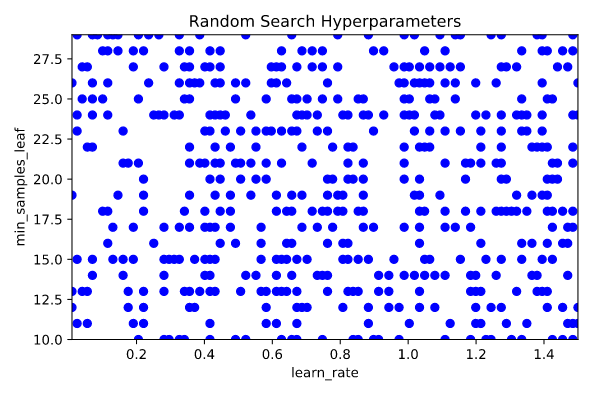

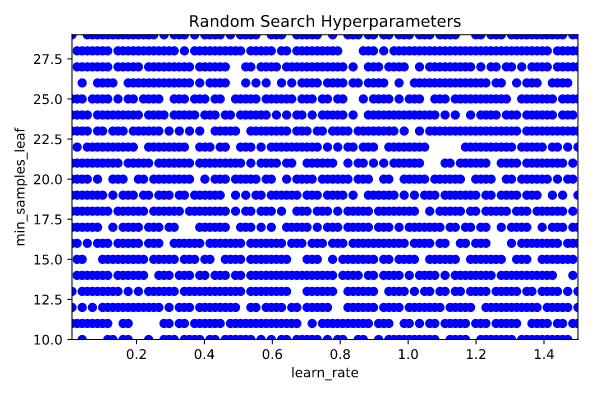

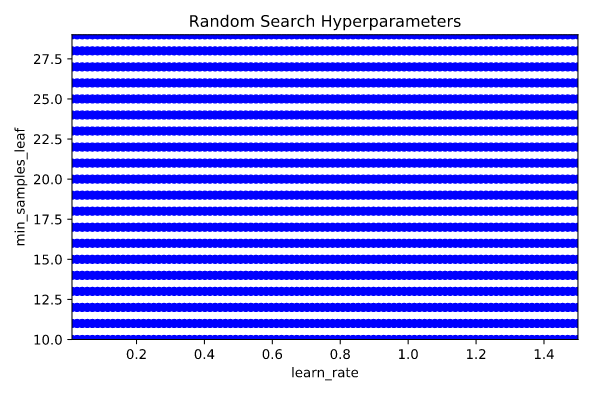

Conclusion

Those were some great viz you produced! Notice how the bigger your sample space of a random search the more it looks like a grid search? In a later lesson we will look closer at comparing these two methods side by side.

# Random Search in Scikit Learn

Got It!
1. Random Search in Scikit Learn
In this lesson we will be introduced to Scikit Learn's RandomizedSearchCV module. Just like with GridSearchCV, it is a more efficient way of undertaking random search than doing it manually and allows us to easily capture extra information on our training.

2. Comparing to GridSearchCV
Since we have already covered GridSearchCV, we don't need to learn a lot of new steps. Let's recall the steps for a Grid Search: One. Decide an algorithm to tune the hyperparameters for. (Sometimes called an "estimator"). Two. Define which hyperparameters we will tune. Three. Define a range of values for each hyperparameter. Four. Set a cross-validation scheme. Five. Define a scoring function so we can decide which grid square (model) was the best. Six. Decide to include extra useful information or functions.

3. Comparing to Grid Search
There is only one difference when undertaking a random search. We need to decide how many hyperparameter combinations we will randomly sample to build models and then undertake this sampling before we model. And that's pretty much it!

4. Comparing Scikit Learn Modules
It is therefore not a surprise to see how similar the functions are between the two Scikit Learn modules. See them here side by side. It may not be obvious what is different since there is far more the same than not!

5. Key differences
There is really only two key differences: n_iter, which is the number of samples for the random search to take from your grid. In the previous example you did 300. param_distributions, is slightly different from param_grid. You can optionally give information on how to sample such as using a particular distribution you provide. If you just give a list as we have been doing, the default is to sample 'uniformly' meaning every item in the list (combination) has equal chance of being chosen.

6. Build a RandomizedSearchCV Object
Now let's create a RandomSearchCV object, including the key changes we need to make. Creating a list of values and setting up the grid looks all very similar. We firstly create the lists of hyperparameter values using the np-dot-linspace() and range() functions, then set up the dictionary grid of hyperparameter values. The crucial small difference is at the end, defining how many samples to take.

7. Build a RandomizedSearchCV Object
Now we create the random search object Note the slightly different name for the parameter grid, which is now called 'param_distributions' as well as our new n_iter input for how many combinations to select and train models with.

8. Analyze the output
The attributes that form the output of RandomizedSearchCV are exactly the same as the GridSearchCV module. However it would be interesting to see what numbers it sampled. We can visualize using the code from the previous lesson but where do we get details on the hyperparameters used? Do you remember? That's right - it is found in the cv_results_ dictionary that was returned and in the relevant param_ columns. Let's extract the learning_rate and min_samples_leaf used to plot them.

9. Analyze the output
Now we can plot our results. We set the x and y limits using NumPy's min and max functions over our list of hyperparameter values so that we can best see the coverage. Then we plot these combinations as a scatter plot. For computational efficiency we only ran 10 models this time. Else it would take a while!

10. Analyze the output
You will notice this is plot looks very similar to what plotted before as hyperparameter combinations without actually undertaking the model creation. Now we actually ran one, it looks very similar. Random search has a wide coverage of area for possible hyperparameters but it is a very patchy coverage.

11. Let's practice!
Now it's your turn to try your hand at Scikit Learn's RandomizedSearchCV module!

# RandomSearchCV inputs

Let's test your knowledge of how RandomizedSearchCV differs from GridSearchCV.

You can check the documentation on Scitkit Learn's website to compare these two functions.

Which of these parameters is only for a RandomizedSearchCV?

Possible Answers

1. param_grid
 - Incorrect Submission: Not this one. This a slightly different input and named slightly differently for RandomizedSearchCV

2. n_jobs
 - Incorrect Submission: This is not correct. You can parallelize both of these functions.

3. best_estimator_
 - Incorrect Submission: This is actually an output of the process (and available for both functions).

4. n_iter
 - Correct! RandomizedSearchCV asks you for how many models to sample from the grid you set.

# The RandomizedSearchCV Object

Just like the GridSearchCV library from Scikit Learn, RandomizedSearchCV provides many useful features to assist with efficiently undertaking a random search. You're going to create a RandomizedSearchCV object, making the small adjustment needed from the GridSearchCV object.

The desired options are:

 - A default Gradient Boosting Classifier Estimator
 - 5-fold cross validation
 - Use accuracy to score the models
 - Use 4 cores for processing in parallel
 - Ensure you refit the best model and return training scores
 - Randomly sample 10 models

The hyperparameter grid should be for learning_rate (150 values between 0.1 and 2) and min_samples_leaf (all values between and including 20 and 64).

You will have available X_train & y_train datasets.

Instructions

1. Create a parameter grid as specified in the context above.

2. Create a RandomizedSearchCV object as outlined in the context above.

3. Fit the RandomizedSearchCV object to the training data.

4. Print the values chosen by the modeling process for both hyperparameters

In [ ]:
# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1,2,150), 'min_samples_leaf': list(range(20,65))} 

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = param_grid,
    n_iter = 10,
    scoring='accuracy', n_jobs=10, cv = 5, refit=True, return_train_score = True)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])

'''
<script.py> output:
    [1.1073825503355705 1.0691275167785235 0.4697986577181208
     1.2476510067114095 1.5664429530201343 1.7577181208053692
     1.859731543624161 1.5791946308724834 0.5463087248322147
     1.7577181208053692]
     
    [47 54 61 30 63 32 60 43 38 27]
'''

Conclusion

Great work! You have succesfully taken the knowledge gained from the grid search section and adjusted it to be able to run a random search. This is a very valuable tool to add to your Machine Learning Toolkit!

# RandomSearchCV in Scikit Learn

Let's practice building a RandomizedSearchCV object using Scikit Learn.

The hyperparameter grid should be for max_depth (all values between and including 5 and 25) and max_features ('auto' and 'sqrt').

The desired options for the RandomizedSearchCV object are:

 - A RandomForestClassifier Estimator with n_estimators of 80.
 - 3-fold cross validation (cv)
 - Use roc_auc to score the models
 - Use 4 cores for processing in parallel (n_jobs)
 - Ensure you refit the best model and return training scores
 - Only sample 5 models for efficiency (n_iter)

X_train & y_train datasets are loaded for you.

Remember, to extract the chosen hyperparameters these are found in cv_results_ with a column per hyperparameter. For example, the column for the hyperparameter criterion would be param_criterion.

Instructions

1. Create a hyperparameter grid as specified in the context above.

2. Create a RandomizedSearchCV object as outlined in the context above.

3. Fit the RandomizedSearchCV object to the training data.

4. Index into the cv_results_ object to print the values chosen by the modeling process for both hyperparameters (max_depth and max_features).

In [ ]:
# Create the parameter grid
param_grid = {'max_depth': list(range(5,26)), 'max_features': ['auto' , 'sqrt']} 

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=80),
    param_distributions = param_grid, n_iter = 5,
    scoring='roc_auc', n_jobs=4, cv = 3, refit=True, return_train_score = True )

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

'''
<script.py> output:
    [18 11 10 22 10]
    ['sqrt' 'auto' 'sqrt' 'sqrt' 'auto']
'''

Conclusion

Excellent stuff! You adapted your knowledge to a new algorithm and set of hyperparameters and values. Being able to transpose your knowledge to new situations is an invaluable skill - excellent!

# Comparing Grid and Random Search

1. Comparing Grid and Random Search
In the previous lessons we looked at both Grid and Random search in depth. Before we move on to more advanced methods, it is a good idea to stop and reinforce our knowledge on these two valuable techniques.

2. What's the same?
There are a number of similarities for these techniques. Both are automated ways of tuning different hyperparameters. For both you set the grid to sample from (which hyperparameters and values for each). For both you need to think carefully about which hyperparameters and values to sample from as your model will only be as good as the grid you set! And for both you set a cross-validation scheme and scoring function.

3. What's different?
There are also some key differences between these two techniques. Grid search exhaustively tries all the combinations in the grid or sample space and therefore has no sampling methodology. Random search tries a subset of combinations randomly and you can additionally define how to sample. Remember the default in Scikit Learn is to have every combination equally likely to be chosen, also known as uniform distribution. Because of this, grid search is very computationally expensive compared to random search But Grid Search is guaranteed to find the best score in the sample space whereas random search is not. Though random search has a higher chance to find a good score faster.

4. Which should I use?
So which technique should you use? As we often say in data science - 'It depends'. However there are some things you can consider. Firstly, the more data you have, the stronger the argument for random search. More hyperparameters and values to try also means random search might be a better option. Additionally if you don't have a lot of time or computing power, random search will be more economical. Remember, random search has more chance of getting a good result faster, even if not the absolute best.

5. Let's practice!
Let's do some exercises to illustrate the differences between grid and random search visually and conceptually.

# Comparing Random & Grid Search

In the video, you just studied some of the advantages and disadvantages of random search as compared to grid search.

Which of the following is an advantage of random search?

Possible Answers

1. It exhaustively searches all possible hyperparameter combinations, so is guaranteed to find the best model within the specified grid.
 - Incorrect: This is what a grid search does.

2. It doesn't matter what grid you sample from, it will still find the best model.
 - Incorrect: This is not true. You still need to carefully consider your grid construction including which hyperparameters and the values for each.

3. There are no advantages, it is worse than Grid Search.
 - Incorrect: There are advantages to this method, we covered this early in the slides!

4. It is more computationally efficient than Grid Search.
 - Yes! As you saw in the slides, random search tests a larger space of values so is more likely to get close to the best score, given the same computational resources as Grid Search.


# Grid and Random Search Side by Side

Visualizing the search space of random and grid search together allows you to easily see the coverage that each technique has and therefore brings to life their specific advantages and disadvantages.

In this exercise, you will sample hyperparameter combinations in a grid search way as well as a random search way, then plot these to see the difference.

You will have available:

 - combinations_list which is a list of combinations of learn_rate and min_samples_leaf for this algorithm
 - The function visualize_search() which will make your hyperparameter combinations into X and Y coordinates and plot both grid and random search combinations on the same graph. It takes as input two lists of hyperparameter combinations.



In [ ]:
'''
In [4]:
visualize_search??
Signature: visualize_search(grid_combinations_chosen, random_combinations_chosen)
Source:
def visualize_search(grid_combinations_chosen, random_combinations_chosen):
  grid_y, grid_x = [x[0] for x in grid_combinations_chosen], [x[1] for x in grid_combinations_chosen]
  rand_y, rand_x = [x[0] for x in random_combinations_chosen], [x[1] for x in random_combinations_chosen]

  # Plot all together
  plt.scatter(grid_y + rand_y, grid_x + rand_x, c=['red']*300 + ['blue']*300)
  plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Grid and Random Search Hyperparameters')
  plt.gca().set_xlim(x_lims)
  plt.gca().set_ylim(y_lims)
  plt.show()
'''

Instructions

1. Sample (by slicing) 300 hyperparameter combinations for a grid search from combinations_list into two lists and print the result.

In [ ]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Print result
print(grid_combinations_chosen)

'''
<script.py> output:
    [[0.01, 5], [0.01, 6], [0.01, 7], [0.01, 8], [0.01, 9], [0.01, 10], [0.01, 11], [0.01, 12], [0.01, 13], [0.01, 14], [0.01, 15], [0.01, 16], [0.01, 17], [0.01, 18], [0.01, 19], [0.01, 20], [0.01, 21], [0.01, 22], [0.01, 23], [0.01, 24], [0.025025125628140705, 5], [0.025025125628140705, 6], [0.025025125628140705, 7], [0.025025125628140705, 8], [0.025025125628140705, 9], [0.025025125628140705, 10], [0.025025125628140705, 11], [0.025025125628140705, 12], [0.025025125628140705, 13], [0.025025125628140705, 14], [0.025025125628140705, 15], [0.025025125628140705, 16], [0.025025125628140705, 17], [0.025025125628140705, 18], [0.025025125628140705, 19], [0.025025125628140705, 20], [0.025025125628140705, 21], [0.025025125628140705, 22], [0.025025125628140705, 23], [0.025025125628140705, 24], [0.04005025125628141, 5], [0.04005025125628141, 6], [0.04005025125628141, 7], [0.04005025125628141, 8], [0.04005025125628141, 9], [0.04005025125628141, 10], [0.04005025125628141, 11], [0.04005025125628141, 12], [0.04005025125628141, 13], [0.04005025125628141, 14], [0.04005025125628141, 15], [0.04005025125628141, 16], [0.04005025125628141, 17], [0.04005025125628141, 18], [0.04005025125628141, 19], [0.04005025125628141, 20], [0.04005025125628141, 21], [0.04005025125628141, 22], [0.04005025125628141, 23], [0.04005025125628141, 24], [0.055075376884422114, 5], [0.055075376884422114, 6], [0.055075376884422114, 7], [0.055075376884422114, 8], [0.055075376884422114, 9], [0.055075376884422114, 10], [0.055075376884422114, 11], [0.055075376884422114, 12], [0.055075376884422114, 13], [0.055075376884422114, 14], [0.055075376884422114, 15], [0.055075376884422114, 16], [0.055075376884422114, 17], [0.055075376884422114, 18], [0.055075376884422114, 19], [0.055075376884422114, 20], [0.055075376884422114, 21], [0.055075376884422114, 22], [0.055075376884422114, 23], [0.055075376884422114, 24], [0.07010050251256282, 5], [0.07010050251256282, 6], [0.07010050251256282, 7], [0.07010050251256282, 8], [0.07010050251256282, 9], [0.07010050251256282, 10], [0.07010050251256282, 11], [0.07010050251256282, 12], [0.07010050251256282, 13], [0.07010050251256282, 14], [0.07010050251256282, 15], [0.07010050251256282, 16], [0.07010050251256282, 17], [0.07010050251256282, 18], [0.07010050251256282, 19], [0.07010050251256282, 20], [0.07010050251256282, 21], [0.07010050251256282, 22], [0.07010050251256282, 23], [0.07010050251256282, 24], [0.08512562814070351, 5], [0.08512562814070351, 6], [0.08512562814070351, 7], [0.08512562814070351, 8], [0.08512562814070351, 9], [0.08512562814070351, 10], [0.08512562814070351, 11], [0.08512562814070351, 12], [0.08512562814070351, 13], [0.08512562814070351, 14], [0.08512562814070351, 15], [0.08512562814070351, 16], [0.08512562814070351, 17], [0.08512562814070351, 18], [0.08512562814070351, 19], [0.08512562814070351, 20], [0.08512562814070351, 21], [0.08512562814070351, 22], [0.08512562814070351, 23], [0.08512562814070351, 24], [0.10015075376884422, 5], [0.10015075376884422, 6], [0.10015075376884422, 7], [0.10015075376884422, 8], [0.10015075376884422, 9], [0.10015075376884422, 10], [0.10015075376884422, 11], [0.10015075376884422, 12], [0.10015075376884422, 13], [0.10015075376884422, 14], [0.10015075376884422, 15], [0.10015075376884422, 16], [0.10015075376884422, 17], [0.10015075376884422, 18], [0.10015075376884422, 19], [0.10015075376884422, 20], [0.10015075376884422, 21], [0.10015075376884422, 22], [0.10015075376884422, 23], [0.10015075376884422, 24], [0.11517587939698493, 5], [0.11517587939698493, 6], [0.11517587939698493, 7], [0.11517587939698493, 8], [0.11517587939698493, 9], [0.11517587939698493, 10], [0.11517587939698493, 11], [0.11517587939698493, 12], [0.11517587939698493, 13], [0.11517587939698493, 14], [0.11517587939698493, 15], [0.11517587939698493, 16], [0.11517587939698493, 17], [0.11517587939698493, 18], [0.11517587939698493, 19], [0.11517587939698493, 20], [0.11517587939698493, 21], [0.11517587939698493, 22], [0.11517587939698493, 23], [0.11517587939698493, 24], [0.13020100502512563, 5], [0.13020100502512563, 6], [0.13020100502512563, 7], [0.13020100502512563, 8], [0.13020100502512563, 9], [0.13020100502512563, 10], [0.13020100502512563, 11], [0.13020100502512563, 12], [0.13020100502512563, 13], [0.13020100502512563, 14], [0.13020100502512563, 15], [0.13020100502512563, 16], [0.13020100502512563, 17], [0.13020100502512563, 18], [0.13020100502512563, 19], [0.13020100502512563, 20], [0.13020100502512563, 21], [0.13020100502512563, 22], [0.13020100502512563, 23], [0.13020100502512563, 24], [0.14522613065326634, 5], [0.14522613065326634, 6], [0.14522613065326634, 7], [0.14522613065326634, 8], [0.14522613065326634, 9], [0.14522613065326634, 10], [0.14522613065326634, 11], [0.14522613065326634, 12], [0.14522613065326634, 13], [0.14522613065326634, 14], [0.14522613065326634, 15], [0.14522613065326634, 16], [0.14522613065326634, 17], [0.14522613065326634, 18], [0.14522613065326634, 19], [0.14522613065326634, 20], [0.14522613065326634, 21], [0.14522613065326634, 22], [0.14522613065326634, 23], [0.14522613065326634, 24], [0.16025125628140705, 5], [0.16025125628140705, 6], [0.16025125628140705, 7], [0.16025125628140705, 8], [0.16025125628140705, 9], [0.16025125628140705, 10], [0.16025125628140705, 11], [0.16025125628140705, 12], [0.16025125628140705, 13], [0.16025125628140705, 14], [0.16025125628140705, 15], [0.16025125628140705, 16], [0.16025125628140705, 17], [0.16025125628140705, 18], [0.16025125628140705, 19], [0.16025125628140705, 20], [0.16025125628140705, 21], [0.16025125628140705, 22], [0.16025125628140705, 23], [0.16025125628140705, 24], [0.17527638190954775, 5], [0.17527638190954775, 6], [0.17527638190954775, 7], [0.17527638190954775, 8], [0.17527638190954775, 9], [0.17527638190954775, 10], [0.17527638190954775, 11], [0.17527638190954775, 12], [0.17527638190954775, 13], [0.17527638190954775, 14], [0.17527638190954775, 15], [0.17527638190954775, 16], [0.17527638190954775, 17], [0.17527638190954775, 18], [0.17527638190954775, 19], [0.17527638190954775, 20], [0.17527638190954775, 21], [0.17527638190954775, 22], [0.17527638190954775, 23], [0.17527638190954775, 24], [0.19030150753768846, 5], [0.19030150753768846, 6], [0.19030150753768846, 7], [0.19030150753768846, 8], [0.19030150753768846, 9], [0.19030150753768846, 10], [0.19030150753768846, 11], [0.19030150753768846, 12], [0.19030150753768846, 13], [0.19030150753768846, 14], [0.19030150753768846, 15], [0.19030150753768846, 16], [0.19030150753768846, 17], [0.19030150753768846, 18], [0.19030150753768846, 19], [0.19030150753768846, 20], [0.19030150753768846, 21], [0.19030150753768846, 22], [0.19030150753768846, 23], [0.19030150753768846, 24], [0.20532663316582916, 5], [0.20532663316582916, 6], [0.20532663316582916, 7], [0.20532663316582916, 8], [0.20532663316582916, 9], [0.20532663316582916, 10], [0.20532663316582916, 11], [0.20532663316582916, 12], [0.20532663316582916, 13], [0.20532663316582916, 14], [0.20532663316582916, 15], [0.20532663316582916, 16], [0.20532663316582916, 17], [0.20532663316582916, 18], [0.20532663316582916, 19], [0.20532663316582916, 20], [0.20532663316582916, 21], [0.20532663316582916, 22], [0.20532663316582916, 23], [0.20532663316582916, 24], [0.22035175879396987, 5], [0.22035175879396987, 6], [0.22035175879396987, 7], [0.22035175879396987, 8], [0.22035175879396987, 9], [0.22035175879396987, 10], [0.22035175879396987, 11], [0.22035175879396987, 12], [0.22035175879396987, 13], [0.22035175879396987, 14], [0.22035175879396987, 15], [0.22035175879396987, 16], [0.22035175879396987, 17], [0.22035175879396987, 18], [0.22035175879396987, 19], [0.22035175879396987, 20], [0.22035175879396987, 21], [0.22035175879396987, 22], [0.22035175879396987, 23], [0.22035175879396987, 24]]
'''

2. Let's randomly sample too. Create a list of every index in combinations_list to sample from using range()

3. Use np.random.choice() to sample 300 combinations. The first two arguments are a list to sample from and the number of samples.

In [ ]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

4. Now use the list of random indexes to index into combinations_list using a list comprehension.

In [ ]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

5. Use the provided visualize_search() function to visualize the two sampling methodologies. The first argument is your grid combinations, the second argument is the random combinations you created.

In [ ]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

# Call the function to produce the visualization
visualize_search(grid_combinations_chosen, random_combinations_chosen)

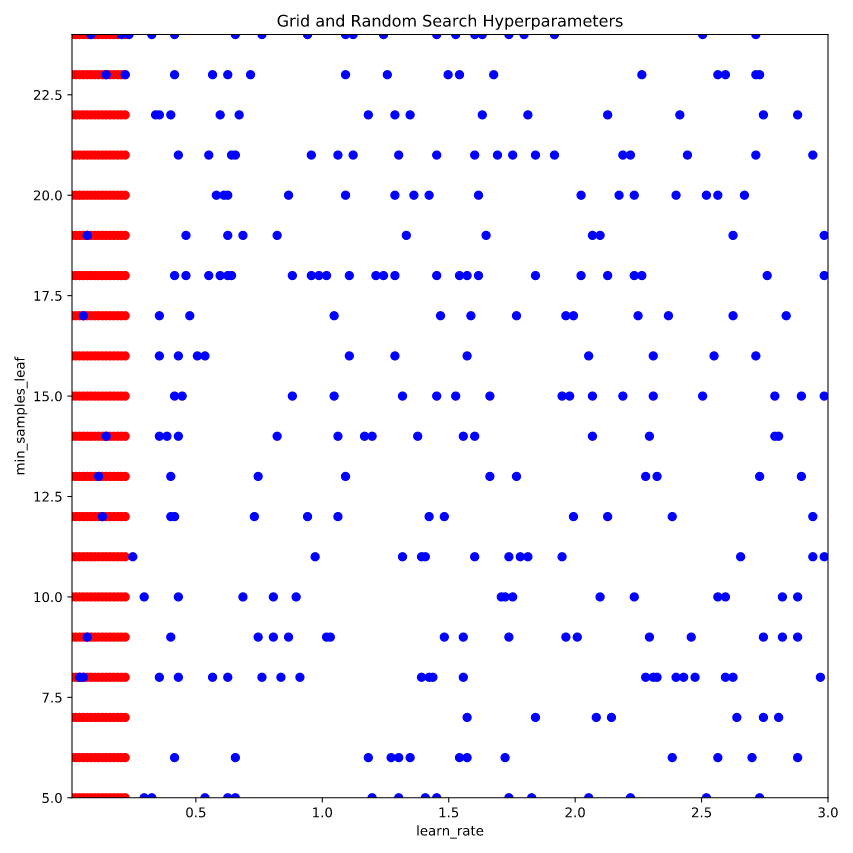

Conclusion

That is a great viz you produced! You can really see how a grid search will cover a small area completely whilst random search will cover a much larger area but not completely.